# Requeriments

In [1]:
import numpy                 as np
#import pandas                as pd
import modin.pandas as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile
import random
#import sklearn.metrics       as Metrics

#pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)
#pd.reset_option('max_columns')
#pd.reset_option('max_columns')

## Loading data (Toevaluate_data)

In [2]:
zip_file = ZipFile('/mnt/workstation/data/dt2020_base_evaluar.zip')
Toevaluate = pd.read_csv(zip_file.open("dt2020_base_evaluar.csv"), sep= ",")
Toevaluate

To request implementation, send an email to feature_requests@modin.org.


,id_registro,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,...,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social
0,4055#201902,201902,4055,19721103,46.203970,M,CASADO,UNIVERSITARIO,DISEÑO Y PUBLICIDAD,Empleado,...,127148000.0,1797000.0,7.0,0.0,2.060457e+06,A,0.0,74339,2734528.0,NaN
1,12598#201902,201902,12598,19750930,43.299110,M,SOLTERO,UNIVERSITARIO,ADMINISTRACION,Empleado,...,87661000.0,0.0,5.0,66.0,-7.187437e+07,H,15.0,NaN,2291070.0,NaN
2,23697#201902,201902,23697,19740130,44.963723,M,CASADO,UNIVERSITARIO,OTROS,Empleado,...,58967000.0,0.0,3.0,0.0,-1.448765e+06,A,0.0,NaN,NaN,NaN
3,23768#201902,201902,23768,19610620,57.577002,M,NO INFORMA,BACHILLER,NaN,Empleado,...,0.0,0.0,0.0,0.0,2.208260e+06,G,0.0,NaN,NaN,NaN
4,7174#201902,201902,7174,19661010,52.271047,F,DIVORCIADO,UNIVERSITARIO,MEDICINA,Empleado,...,22746000.0,0.0,7.0,0.0,3.212636e+06,A,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,8596193#202011,202011,8596193,19740415,46.516085,F,SOLTERO,UNIVERSITARIO,OTROS,Empleado,...,0.0,0.0,2.0,0.0,2.101424e+06,A,0.0,70721,2281362.5,3876343.0
281662,8616083#202011,202011,8616083,19850620,35.334702,M,NO INFORMA,NO INFORMA,NaN,Socio Empleado - Socio,...,99000.0,0.0,12.0,0.0,1.170550e+07,C,0.0,NaN,14510896.0,NaN
281663,8670207#202011,202011,8670207,19740316,46.598220,M,DIVORCIADO,NO INFORMA,NaN,Profesional Independiente,...,300000.0,0.0,17.0,0.0,-4.154790e+07,D,0.0,NaN,NaN,NaN
281664,8677655#202011,202011,8677655,19780722,42.247775,F,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,...,184811000.0,0.0,18.0,0.0,5.313457e+06,B,0.0,70077,11401109.0,14481371.0


## Loading data (Totrain_data)

In [3]:
Totrain = pd.read_csv("/mnt/workstation/data/input_CategoricasArregladas.csv")#, sep= ",", names =header)
Totrain = Totrain.iloc[:,1:]
Totrain

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,...,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201908.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,232526.0
1,201909.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,265900.0
2,201907.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,311306.0,C,0.0,NaN,1255032.0,NaN,243052.0
3,201903.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,311306.0,C,0.0,NaN,1172612.0,NaN,276014.0
4,201911.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,0.0,0.0,677516.0,C,0.0,NaN,1255032.0,NaN,418866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255243,201910.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,3.0,0.0,929800.0,C,0.0,NaN,NaN,NaN,25500.0
19255244,202002.0,2090044.0,19670629.0,53.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,3.0,0.0,41800.0,D,0.0,NaN,NaN,NaN,147900.0
19255245,201903.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,0.0,0.0,928500.0,B,0.0,NaN,NaN,NaN,777437.1
19255246,202001.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,3.0,0.0,41800.0,D,0.0,NaN,NaN,NaN,1131012.0


## Describe

In [4]:
features = pd.DataFrame(Totrain.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [5]:
Toevaluate[features_o].describe(include = 'all').T

,count,unique,top,freq
genero,281666,2,M,147201
estado_civil,281148,7,SOLTERO,117802
nivel_academico,281666,8,UNIVERSITARIO,135682
profesion,232080,87,OTROS,89039
ocupacion,281650,17,Empleado,190779
tipo_vivienda,190599,4,FAMILIAR,85554
ciudad_residencia,280823,995,BOGOTA D.C. ...,77251
departamento_residencia,281554,38,ANTIOQUIA ...,107934
ciudad_laboral,232616,997,BOGOTA D.C. ...,69330
departamento_laboral,230738,38,ANTIOQUIA ...,86288


In [6]:
Toevaluate.describe().T

,count,mean,std,min,25%,50%,75%,max
periodo,281666.0,2.019589e+05,4.975518e+01,2.019020e+05,2.019070e+05,2.020010e+05,2.020070e+05,2.020110e+05
id_cli,281666.0,3.155830e+06,2.689026e+06,4.200000e+01,1.055391e+06,2.262922e+06,4.458678e+06,8.704801e+06
fecha_nacimiento,281666.0,1.976075e+07,1.303433e+05,1.920010e+07,1.968042e+07,1.979050e+07,1.986053e+07,2.001010e+07
edad,281666.0,4.341777e+01,1.304668e+01,1.845585e+01,3.349213e+01,4.032033e+01,5.162218e+01,9.963860e+01
ult_actual,281666.0,2.019094e+07,7.346158e+03,2.017013e+07,2.019013e+07,2.019072e+07,2.020012e+07,2.020102e+07
categoria,278342.0,1.799861e+00,8.780026e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
codigo_ciiu,281666.0,5.616932e+02,1.894647e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+03
mora_max,219245.0,2.800547e+00,1.594567e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.120000e+03
cant_moras_30_ult_12_meses,219245.0,2.699263e-02,3.466272e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_60_ult_12_meses,219245.0,1.254305e-02,2.580331e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01


In [7]:
Totrain[features_o].describe(include = 'all').T

,count,unique,top,freq
genero,19255248,2,M,9731146
estado_civil,17367098,5,SOLTERO,8912674
nivel_academico,13462351,6,UNIVERSITARIO,6907133
profesion,13479312,79,OTROS,5192581
ocupacion,19189090,10,Empleado,12159872
tipo_vivienda,9050814,3,FAMILIAR,4381905
ciudad_residencia,19209195,1521,BOGOTA D.C.,4877742
departamento_residencia,19074043,34,ANTIOQUIA,6239768
ciudad_laboral,14025157,1331,BOGOTA D.C.,4034999
departamento_laboral,13456250,34,ANTIOQUIA,4362626


In [8]:
Totrain.describe().T

,count,mean,std,min,25%,50%,75%,max
periodo,19255248.0,2.019594e+05,4.968779e+01,2.019020e+05,2.019070e+05,2.020010e+05,2.020070e+05,2.020110e+05
id_cli,19255248.0,3.393917e+06,2.461785e+06,3.000000e+00,1.374000e+06,2.895966e+06,4.940005e+06,8.704800e+06
fecha_nacimiento,19255248.0,1.978353e+07,1.377617e+05,1.900053e+07,1.970031e+07,1.981111e+07,1.989072e+07,2.020092e+07
edad,19255248.0,4.114562e+01,1.378647e+01,0.000000e+00,3.000000e+01,3.800000e+01,5.000000e+01,1.200000e+02
ult_actual,19255248.0,2.019040e+07,3.522273e+04,0.000000e+00,2.019011e+07,2.019072e+07,2.020010e+07,2.020102e+07
categoria,19255248.0,1.677362e+00,1.030227e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
codigo_ciiu,19255248.0,7.594965e+02,2.140895e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+03
mora_max,13388034.0,4.653830e+00,2.200446e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.367000e+03
cant_moras_30_ult_12_meses,13388034.0,6.555361e-02,5.391823e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_60_ult_12_meses,13388034.0,3.357565e-02,4.088394e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01


# Nulls

In [5]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [10]:
Nulos = 100*Totrain.isnull().sum()/Totrain.shape[0]
Nulos = pd.DataFrame(Nulos)
Nulos.sort_values(by=[0],ascending=False)

,0
cuota_cred_hipot,99.978972
rechazo_credito,99.457930
convenio_lib,86.021027
ingreso_nomina,73.559510
ingreso_segurida_social,72.267015
cat_ingreso,59.970991
tipo_vivienda,52.995599
mora_max,30.470727
cant_moras_90_ult_12_meses,30.470727
cant_moras_30_ult_12_meses,30.470727


In [11]:
Nulos = 100*Toevaluate.isnull().sum()/Toevaluate.shape[0]
Nulos = pd.DataFrame(Nulos)
Nulos.sort_values(by=[0],ascending=False)

,0
tiene_cred_hipo_2,99.870414
tiene_ctas_embargadas,99.783786
rechazo_credito,99.420590
pension_fopep,98.392067
tiene_cred_hipo_1,88.638671
cuota_cred_hipot,88.540328
tiene_consumo,84.911917
convenio_lib,80.303977
tiene_crediagil,78.917583
ingreso_segurida_social,66.651282


# Ceros

In [6]:
To_replacena = ['mora_max',
                'cant_moras_30_ult_12_meses',
                'cant_moras_60_ult_12_meses',
                'cant_moras_90_ult_12_meses',
                'cant_mora_30_tdc_ult_3m_sf',
                'cant_mora_30_consum_ult_3m_sf',
                'cant_oblig_tot_sf',
                'cant_cast_ult_12m_sr',
                'ctas_activas',
                'ctas_embargadas']

In [7]:
for i in To_replacena:
    Totrain[i] = Totrain[i].replace(np.nan,0)
    Toevaluate[i] = Toevaluate[i].replace(np.nan,0)

## Numerical variables Distribution

## Train set

In [14]:
list(features_f)

['periodo',
 'id_cli',
 'fecha_nacimiento',
 'edad',
 'ult_actual',
 'codigo_ciiu',
 'mora_max',
 'cant_moras_30_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'cupo_total_tc',
 'cuota_tc_bancolombia',
 'nro_tot_cuentas',
 'ctas_activas',
 'ctas_embargadas',
 'cuota_cred_hipot',
 'mediana_nom3',
 'mediana_pen3',
 'ingreso_nompen',
 'ingreso_final',
 'cant_mora_30_tdc_ult_3m_sf',
 'cant_mora_30_consum_ult_3m_sf',
 'cuota_de_vivienda',
 'cuota_de_consumo',
 'cuota_rotativos',
 'cuota_tarjeta_de_credito',
 'cuota_de_sector_solidario',
 'cuota_sector_real_comercio',
 'cupo_tc_mdo',
 'saldo_prom3_tdc_mdo',
 'cuota_tc_mdo',
 'saldo_no_rot_mdo',
 'cuota_libranza_sf',
 'cant_oblig_tot_sf',
 'cant_cast_ult_12m_sr',
 'ind',
 'pol_centr_ext',
 'convenio_lib',
 'ingreso_nomina',
 'ingreso_segurida_social',
 'gasto_familiar']

In [15]:
len(features_f)

41

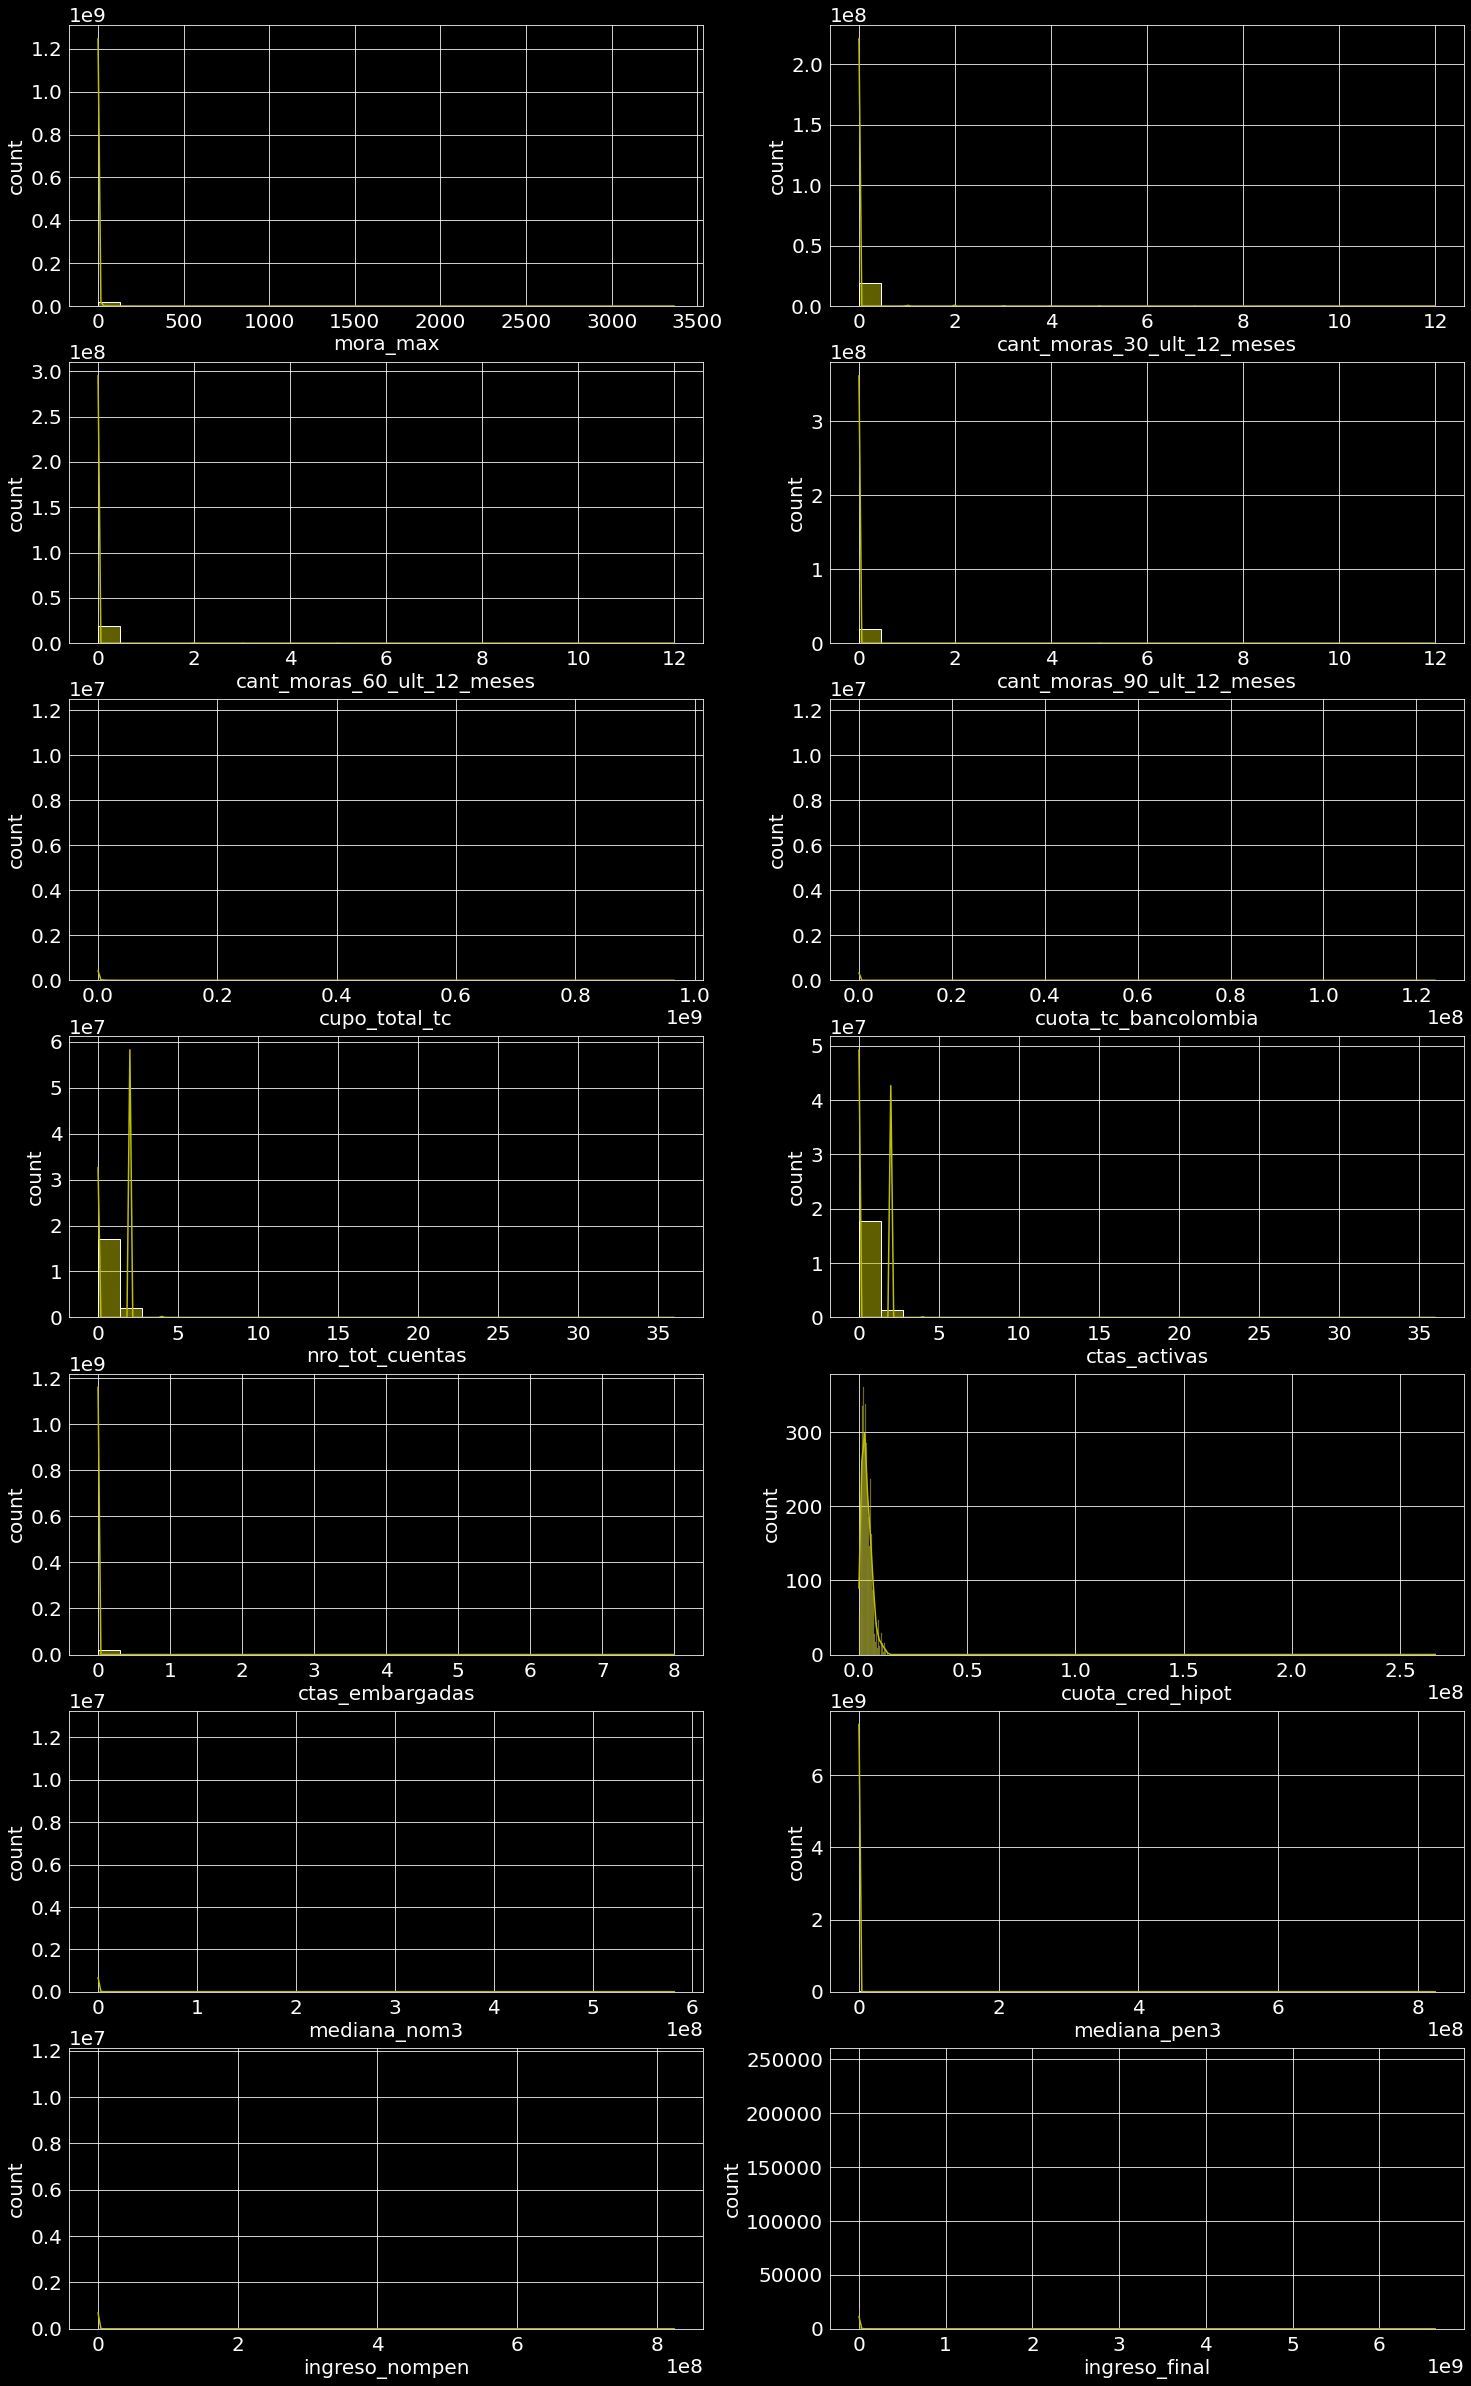

In [16]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = features_f[6:20]
plt.figure(figsize=(25,6*len(features_f)/2))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(round(len(features_f)/2),2,i+1)
    sns.histplot(Totrain, x=var, color='y', kde=True)
    plt.xlabel(var)
    plt.ylabel("count")

In [ ]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = features_f[20:34]
plt.figure(figsize=(25,6*len(features_f)/2))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(round(len(features_f)/2),2,i+1)
    sns.histplot(Totrain, x=var, color='y', kde=True)
    plt.xlabel(var)
    plt.ylabel("count")

In [ ]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = features_f[34:42]
plt.figure(figsize=(25,6*len(features_f)/2))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(round(len(features_f)/2),2,i+1)
    sns.histplot(Totrain, x=var, color='y', kde=True)
    plt.xlabel(var)
    plt.ylabel("count")